## **GBM (Regression)**

In [1]:
# 필요한 기본 package 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/yun-seon/DX-Training-LGES-0630.git

Cloning into 'DX-Training-LGES-0630'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 39 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.


### **(1) 발전소 전기 에너지 출력(PE) 예측**

In [3]:
'''
CCPP Data : 6년 간(2006-2011) 발전소가 최대 부하로 작동할 때 시간당 순수 전기 에너지 출력(PE)를
평균 주변 온도(AT), 주변 압력(AP), 상대 습도(RH), 배기 진공(V) 센서 데이터를 이용해 예측하는 데이터
'''
# 데이터 불러오기
csv = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_CCPP.csv", encoding = "UTF-8-sig")
csv.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [4]:
# 데이터 타입(type) 확인
csv.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [5]:
# 학습 데이터와 테스트 데이터 구분

#학습 데이터 비율: 0.7, 테스트 데이터 비율: 0.3
train_data, test_data = train_test_split(csv, train_size = 0.7)

#독립변수(Xs)와 종속변수(Y) 구분
train_X = train_data.iloc[:, :-1].reset_index(drop = True) # train_X에 종속변수 제거
train_Y = train_data.iloc[:, -1].reset_index(drop = True) # train_Y(종속변수) 따로 저장

test_X = test_data.iloc[:, :-1].reset_index(drop = True) # test_X에 종속변수 제거
test_Y = test_data.iloc[:, -1].reset_index(drop = True) # test_Y(종속변수) 따로 저장

In [6]:
test_X

,AT,V,AP,RH
0,25.64,47.01,1014.81,62.29
1,31.82,73.68,1014.80,40.58
2,8.19,41.66,1016.57,75.38
3,22.52,64.27,1014.34,82.77
4,25.04,65.48,1017.66,57.08
...,...,...,...,...
2866,16.15,41.85,1016.54,81.58
2867,31.85,73.91,1003.60,60.22
2868,8.57,40.23,1017.53,90.46
2869,3.68,39.64,1011.31,84.05


In [7]:
# GBM 모델(예측) package 불러오기
from sklearn.ensemble import GradientBoostingRegressor

#모델 파라미터 설정
'''
파라미터 목록: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
'''
model = GradientBoostingRegressor(loss          = "ls",
                                  learning_rate = 0.1,
                                  n_estimators  = 100,
                                  criterion     = "mse",
                                  max_depth     = 3,
                                  min_samples_split = 2,
                                  min_samples_leaf  = 1,
                                  verbose = 1)

#설정된 모델 파라미터에 데이터 fitting (GBM 학습)
model.fit(train_X, train_Y)

      Iter       Train Loss   Remaining Time 
         1         240.9649            1.34s
         2         200.0009            1.30s
         3         166.7177            1.26s
         4         139.6884            1.44s
         5         117.5638            1.57s
         6          99.5941            1.49s
         7          84.9058            1.53s
         8          72.7471            1.48s
         9          62.8740            1.43s
        10          54.8346            1.54s
        20          22.5619            1.65s
        30          17.0965            1.28s
        40          15.7506            1.02s
        50          15.1518            0.87s
        60          14.7806            0.67s
        70          14.5482            0.49s
        80          14.2181            0.33s
        90          13.9537            0.17s
       100          13.7203            0.00s


GradientBoostingRegressor(criterion='mse', loss='ls', verbose=1)

In [8]:
# 학습한 GBM 모델을 통해 테스트 데이터 예측

#pred 변수에 실제값 추가
pred = pd.DataFrame(test_Y)

#생성된 모델로 예측하기 / pred 변수에 예측값 추가
pred["pred"] = model.predict(test_X)

# 예측 결과 확인 (첫 10 instances)
pred.head(10)

,PE,pred
0,454.48,448.056771
1,433.32,432.320305
2,485.20,482.024992
3,445.40,445.114477
4,440.92,444.479146
5,431.35,434.702259
6,463.86,463.083471
7,439.66,441.890405
8,451.81,450.713159
9,441.70,436.123514


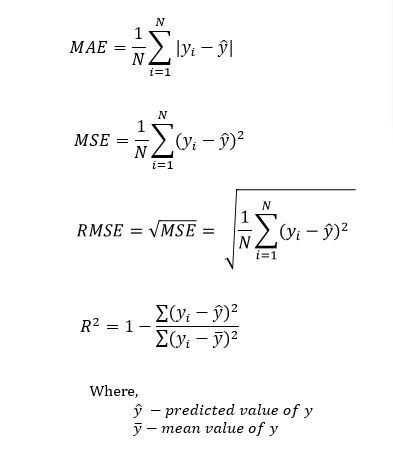

MAE :  2.9480453618534286
MSE :  14.83247485370967


Text(0, 0.5, 'pred')

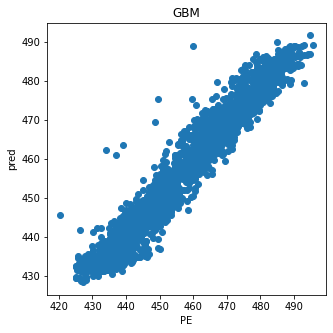

In [9]:
# 예측 값과 실제 값 간의 오차 확인

# Mean Absolute Error (MAE)
MAE = np.abs(pred.PE - pred.pred).mean()
print("MAE : ", MAE)

# Mean Squared Error (MSE)
MSE = np.power(pred.PE - pred.pred, 2).mean()
print("MSE : ", MSE)

# 오차 Plot
plt.figure(figsize = (5, 5))
plt.title("GBM")
plt.scatter(pred.PE, pred.pred)
plt.xlabel("PE")
plt.ylabel("pred")

### **(2) 터키 북서부 가스 터빈의 가스 방출량 예측**

In [10]:
'''
pp_gas_emission dataset : 터키 북서부 지역에 위치한 가스 터빈에서 시간당 1시간동안 집계된 11개 센서, 36733개 instance가 5년치로 나누어져 있음 (날짜는 제공되지 않지만 시간순서로 정렬되어있음)

타겟명은 'TEY'(Turbine energy yield, 터빈 에너지 생산량)이고, 주변 온도(AT), 주변 압력(AP), 주변 습도 (AH), 에어 필터 차압 (AFDP),

가스 터빈 배기 압력 (GTEP), 터빈 입구 온도 (TIT), 터빈 후 온도 (TAT), 압축기 토출 압력 (CDP), 일산화탄소 (CO), 질소 산화물 (NOx)의 10개의 센서 데이터를 이용해 TEY 예측하는 데이터셋
'''

# 데이터셋 불러오기 / 데이터 shape 확인
gt_df1 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2011.csv")
gt_df2 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2012.csv")
gt_df3 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2013.csv")
gt_df4 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2014.csv")
gt_df5 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2015.csv")
print('dataset shape:', gt_df1.shape)
print('dataset shape:', gt_df2.shape)
print('dataset shape:', gt_df3.shape)
print('dataset shape:', gt_df4.shape)
print('dataset shape:', gt_df5.shape)

dataset shape: (7411, 11)
dataset shape: (7628, 11)
dataset shape: (7152, 11)
dataset shape: (7158, 11)
dataset shape: (7384, 11)


In [11]:
# 전체 데이터 위/아래로 병합 (concatenate)

gt_df = pd.concat([gt_df1, gt_df2, gt_df3, gt_df4, gt_df5], axis=0)
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [12]:
# 독립변수(Xs)와 종속변수(Y, 'TEY') 구분
y_labels = gt_df.iloc[:, 7:8].reset_index(drop=True) # y_labels에 종속변수 저장
X_features = gt_df.drop(['TEY'], axis=1).reset_index(drop=True) # X_features에 독립변수 저장

In [13]:
# 학습 데이터와 테스트 데이터 구분
# 학습 데이터 비율: 0.6, 테스트 데이터 비율: 0.4
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.4, random_state=0)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# GBM 모델 파라미터 설정 및 모델 생성
gb_reg = GradientBoostingRegressor(
    loss="ls", n_estimators=500,  verbose=1, random_state=0)

# 모델에 train dataset fitting (학습)
gb_reg.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         198.8831           54.00s
         2         162.3666           56.85s
         3         132.7527           54.99s
         4         108.6569            1.03m
         5          89.0604            1.05m
         6          73.1055            1.02m
         7          60.1292           59.43s
         8          49.5356           58.89s
         9          40.9161           58.33s
        10          33.8876           57.97s
        20           6.4109           55.87s
        30           2.1822           47.66s
        40           1.3345           43.28s
        50           1.0941           40.32s
        60           0.9912           38.09s
        70           0.9299           36.35s
        80           0.8841           34.89s
        90           0.8565           33.66s
       100           0.8247           32.47s
       200           0.6137           22.91s
       300           0.5246           16.04s
       40

GradientBoostingRegressor(loss='ls', n_estimators=500, random_state=0,
                          verbose=1)

In [15]:
# 학습한 GBM 모델을 통해 테스트 데이터 예측
gb_pred = gb_reg.predict(X_test)

# 예측 값과 실제 값 간의 차이(오차) 계산
# Mean Absolute Error (MAE)
gb_mae = mean_absolute_error(y_test, gb_pred)

# Mean Squared Error (MSE)
gb_mse = mean_squared_error(y_test, gb_pred)

# Root Mean Squared Error (RMSE)
gb_rmse = (np.sqrt(mean_squared_error(y_test, gb_pred)))

# 예측 값과 실제 값 간의 R^2(결정 계수) 계산
# 분산 기반으로 예측 성능을 평가 / 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음
gb_r2 = r2_score(y_test, gb_pred)

print("Testing performance")
print('gb_MAE: {:.4f}'.format(gb_mae))
print('gb_MSE: {:.4f}'.format(gb_mse))
print('gb_RMSE: {:.4f}'.format(gb_rmse))
print('gb_R2: {:.4f}'.format(gb_r2))

Testing performance
gb_MAE: 0.5574
gb_MSE: 0.5394
gb_RMSE: 0.7344
gb_R2: 0.9978


In [16]:
# 500번의 반복(iteration)에 대해 예측 결과 할당

# 빈 공간의 ndarray 생성
test_score = np.zeros((500,), dtype=np.float64)

# 예측 값 (y_pred)와 실제 값 (y_test)의 loss를 test_score에 저장
# 학습이 진행될수록 loss값이 0에 가깝게 줄어드는 것을 확인할 수 있음
for i, y_pred in enumerate(gb_reg.staged_predict(X_test)):
    test_score[i] = gb_reg.loss_(y_test.TEY.values, y_pred)

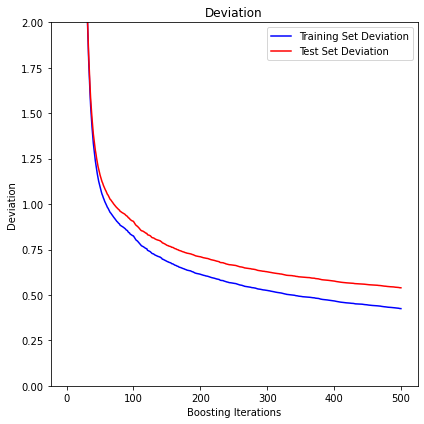

In [17]:
# 500 iteration에 대한 학습 데이터 loss 값(파란선)과 테스트 데이터 loss 값(빨간선)을 확인할 수 있음
# 반복이 거읍될수록 loss값이 감소하며, 점차 0에 가까운 값으로 수렴함

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviation')
plt.plot(np.arange(500) + 1, gb_reg.train_score_,
         'b-', label='Training Set Deviation')
plt.plot(np.arange(500) + 1, test_score, 'r-', label='Test Set Deviation')
plt.ylim(0, 2)
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviation')
fig.tight_layout()
plt.show()

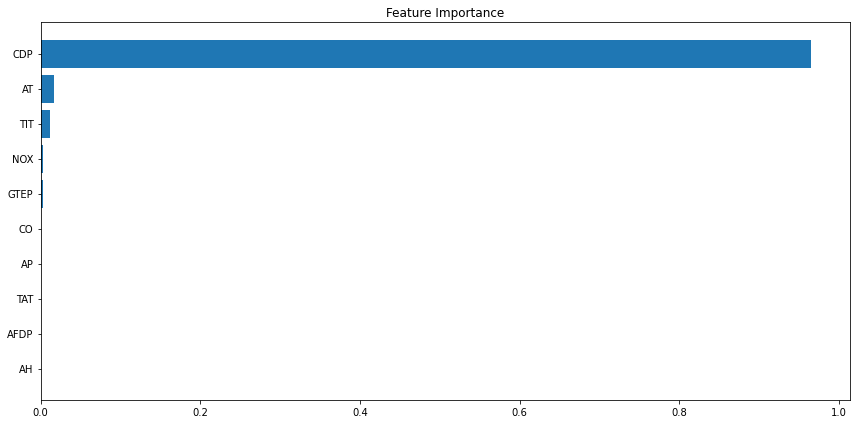

In [18]:
# 의사결정나무 앙상블을 기반으로 하여, GBM 모델을 통해 변수 중요도 추출 가능

# feature importance 산출 / feature importance 값이 높을수록 feature 중요도가 높다고 해석할 수 있음
feature_importance = gb_reg.feature_importances_

# feature_importance를 높은 순서로 정렬
sorted_idx = np.argsort(feature_importance)

# 변수 중요도 plot의 X축 길이를 선정하기 위한 설정
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_features.columns)[sorted_idx])
plt.title('Feature Importance')
fig.tight_layout()
plt.show()